### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective
To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.


### Dataset
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?



### Import the necessary packages

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer
)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from pandas_profiling import ProfileReport

<IPython.core.display.Javascript object>

### Read the dataset aka Exploratory Analysis

In [2]:
data = pd.read_csv("Loan_Modelling.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
loan = data.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [4]:
loan.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [5]:
loan.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [6]:
loan.shape

(5000, 14)

<IPython.core.display.Javascript object>

* The dataset has 5000 rows and 14 columns of data

### Check the data types of the columns for the dataset.

In [7]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


<IPython.core.display.Javascript object>

**Observations -**
* All the dependent variables are float64 or int64.

### Summary of the dataset.

In [8]:
loan.describe(include="all")

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<IPython.core.display.Javascript object>

**Observations-**   

* Min number of years of experience is in negative.
* A very few of the customers have CD Account with this bank.
* 75 percentile of the customers have Advanced/Professional level education.
* 50 percentalie of customers are 45 years of age or above.
* 75 percentile of customers have a family size of 3 members or above.
* A very few of cstomers accepted Personal Loan in last Campaign.
* A very  few of the customers have Securities Account with this Bank.
* Most of the customers have an Online Account with this Bank.
* Most of the customers use Credit Card issued by any of the Banks.
* 75 percentile of the customers use 2.5K credit card amounts every month or above.
* Some customers do not spend using credit cards.
* 75 percentile of the customers have an income of 98K or above and has a wide range from 8k to 224k.
* 75 percentile of the customers have mortgage amount of 101K or above. Average mortgage amount is ~56K. It has a wide range from 0 to 635K.
* Most customers belong to Zip codes 94608 to 96651.
* many customers do not have Mortgage or Personal Loan or Securities Account or CD Account or Online Account, or a credit card.

### Check for missing values

In [9]:
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing vaues in out dataset

### Univariate analysis

In [10]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [11]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

## Observations on Age

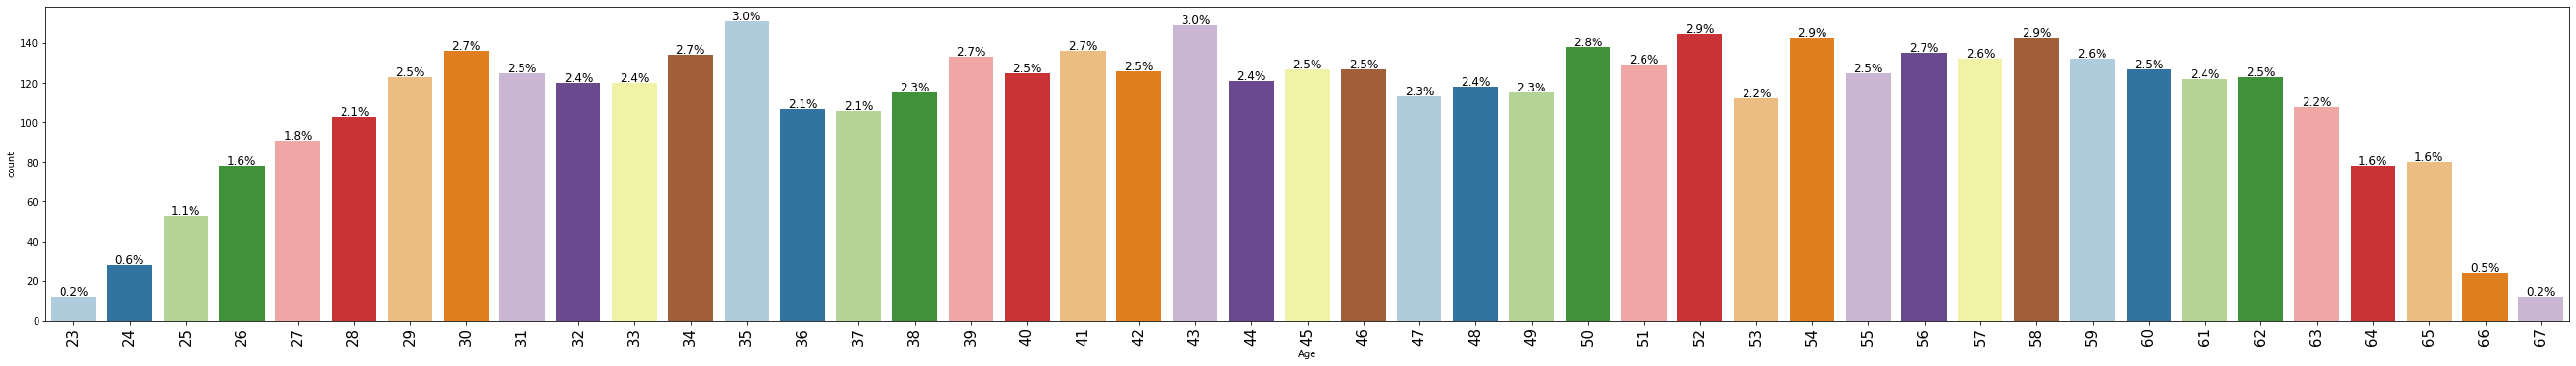

<IPython.core.display.Javascript object>

In [12]:
labeled_barplot(loan, "Age", perc=True)

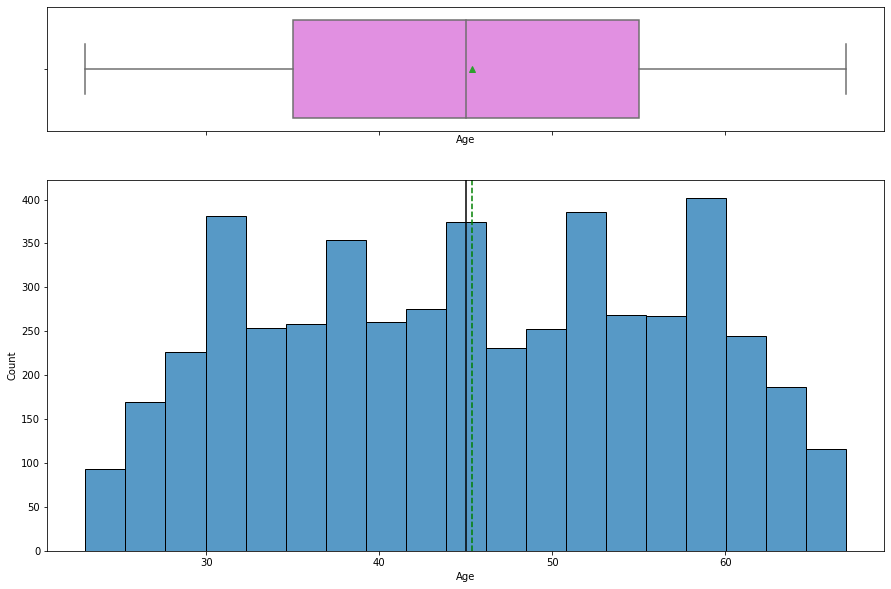

<IPython.core.display.Javascript object>

In [13]:
histogram_boxplot(loan, "Age")

* Age is symmetrical and men and median age is ~45 years.

## Observations on Experience

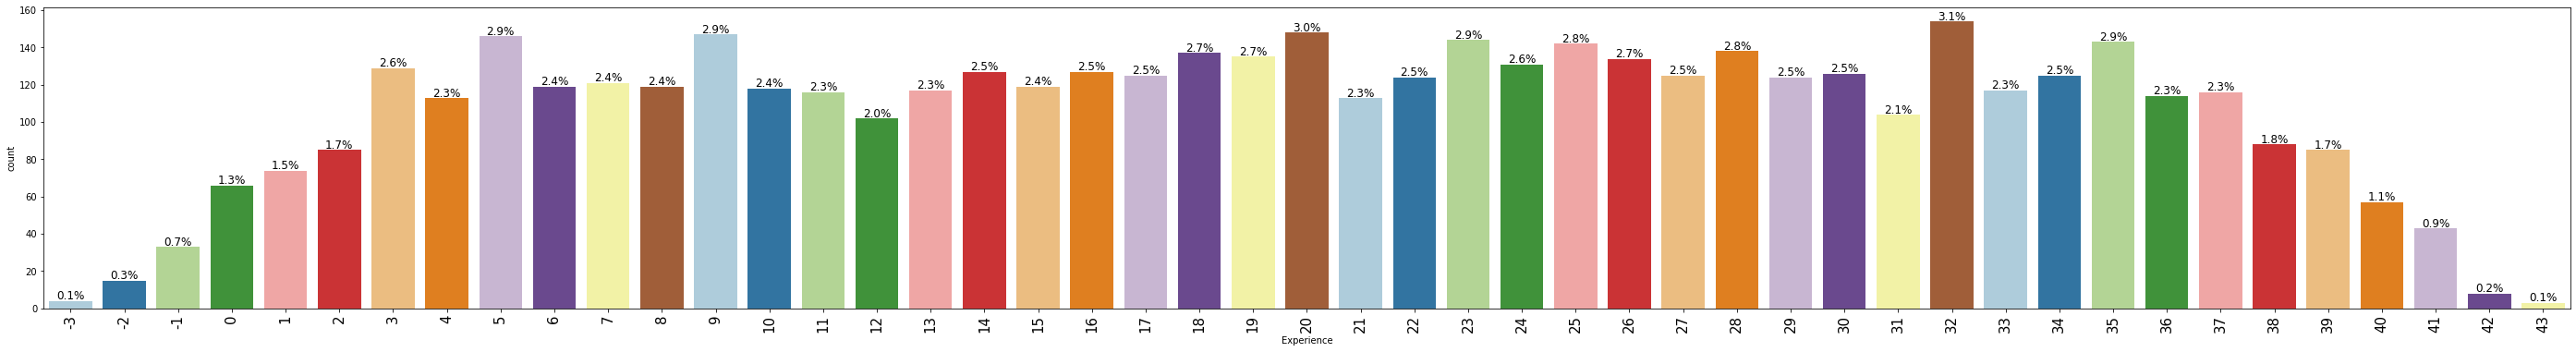

<IPython.core.display.Javascript object>

In [14]:
labeled_barplot(loan, "Experience", perc=True)

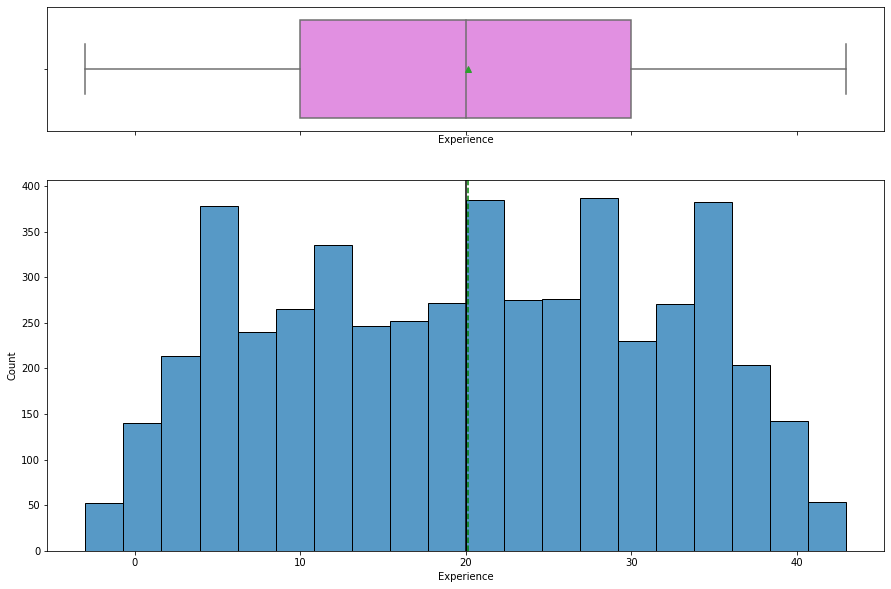

<IPython.core.display.Javascript object>

In [15]:
histogram_boxplot(loan, "Experience")

* Minimum value of experience is Zero.
* Mean and Median is ~20 years. Its symmetrical.

## Observations on CCAvg

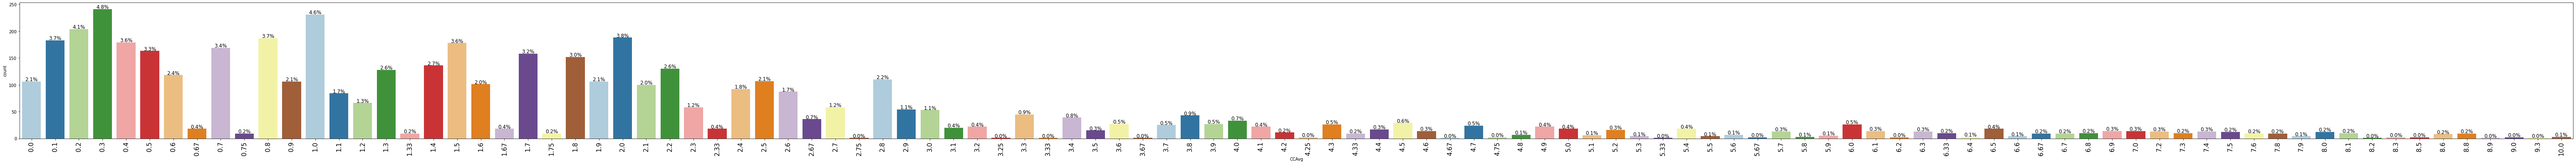

<IPython.core.display.Javascript object>

In [16]:
labeled_barplot(loan, "CCAvg", perc=True)

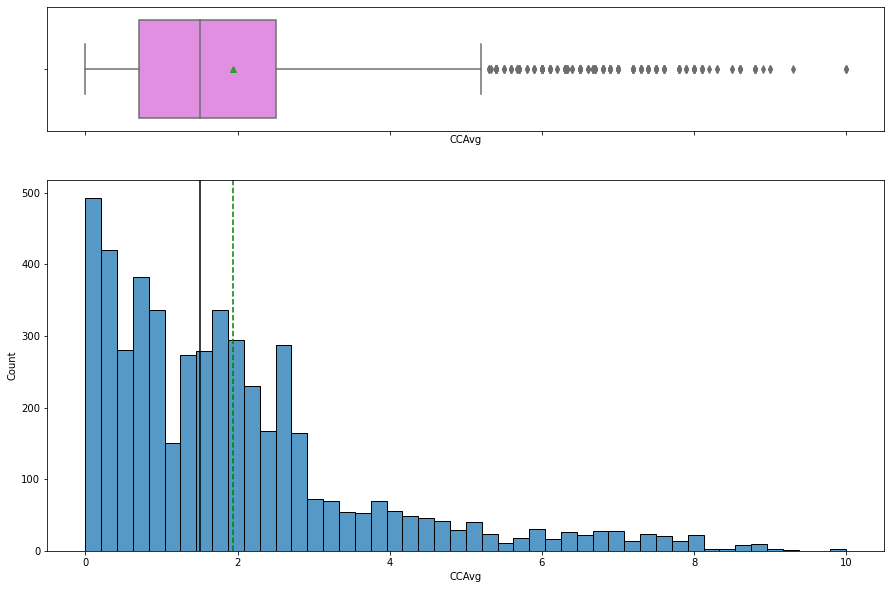

<IPython.core.display.Javascript object>

In [17]:
histogram_boxplot(loan, "CCAvg")

* Distribution of CCAvg is skewed to the right and there are many outliers.
* 50% of customers have ~2.5k  of CCAvg is skewed to the right and there are many outliers.

## Observations on Mortgage

* Note: Double click on graph below to see in larger view.

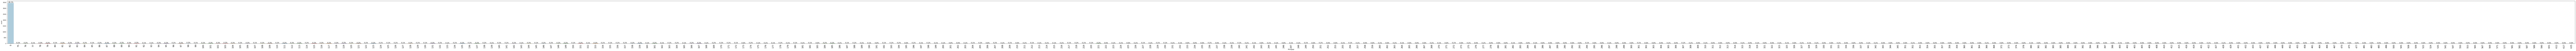

<IPython.core.display.Javascript object>

In [18]:
labeled_barplot(loan, "Mortgage", perc=True)

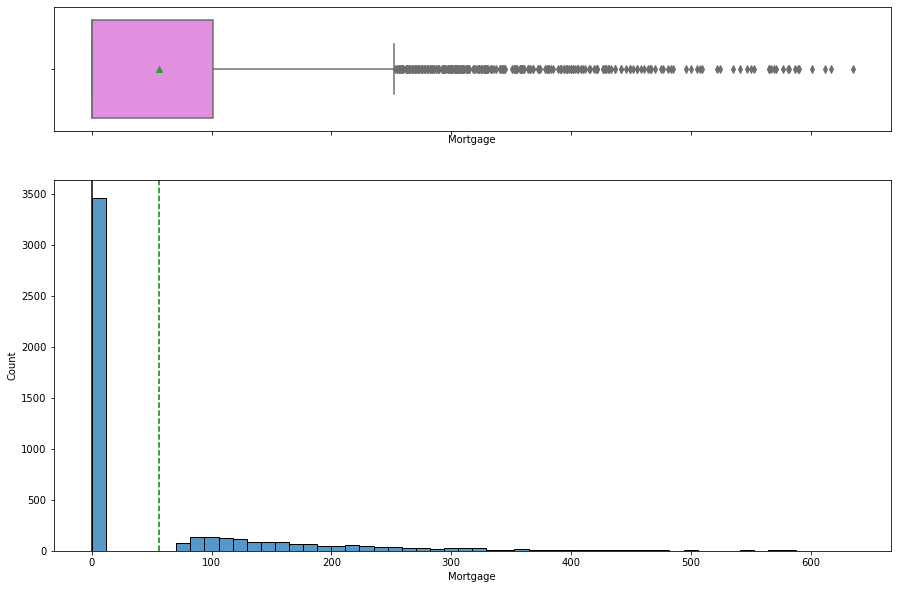

<IPython.core.display.Javascript object>

In [19]:
histogram_boxplot(loan, "Mortgage")

* Most customers have not mortgaged thier houses. There are many outliers.

## Observations on Family

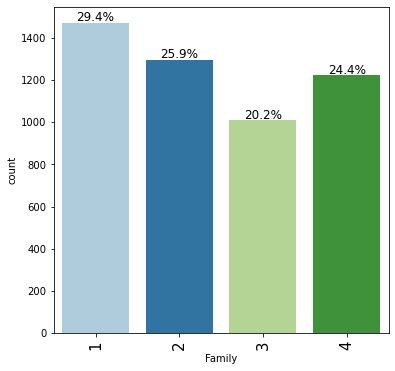

<IPython.core.display.Javascript object>

In [20]:
labeled_barplot(loan, "Family", perc=True)

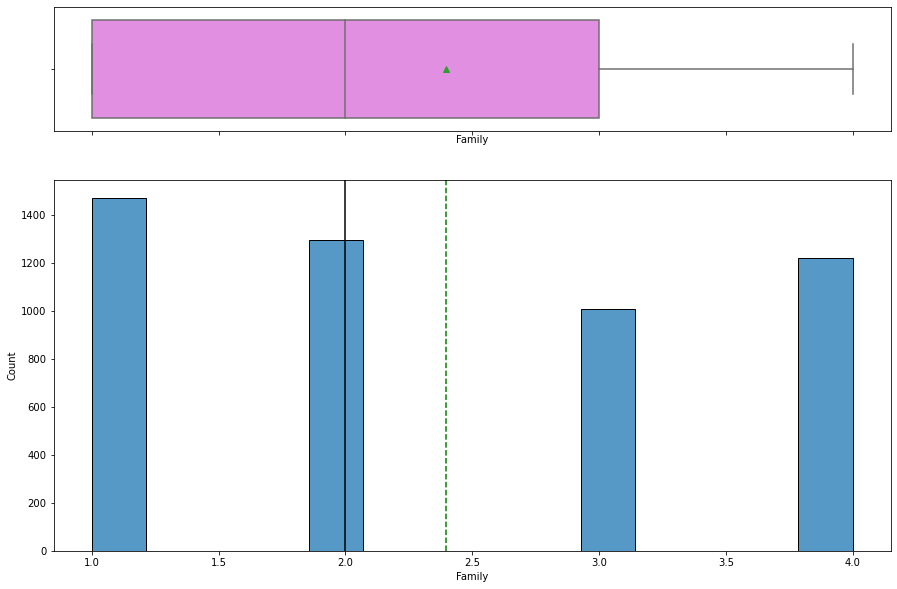

<IPython.core.display.Javascript object>

In [21]:
histogram_boxplot(loan, "Family")

* ~30% of custmers are single.
* ~25% of customers have one person dependent upon them.

## Observations on Education

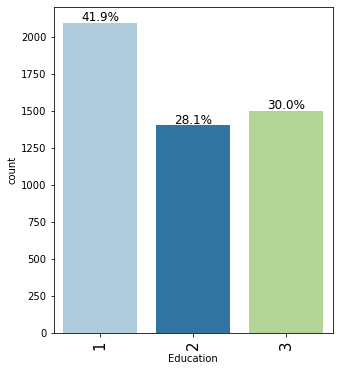

<IPython.core.display.Javascript object>

In [22]:
labeled_barplot(loan, "Education", perc=True)

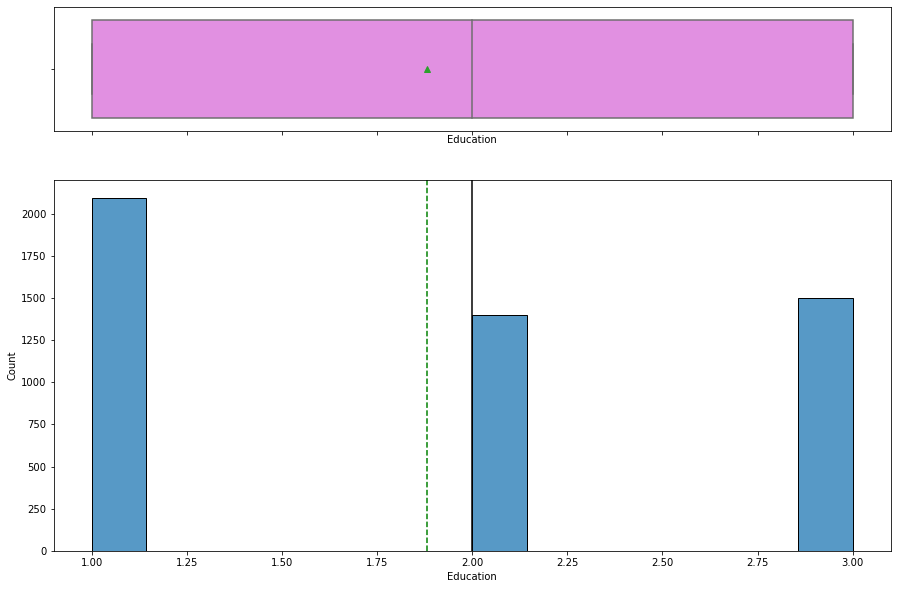

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(loan, "Education")

* ~41.9% of customers are undergraduate followed by 30% with Professional/Higher Education.

## Observations on Securities_Account

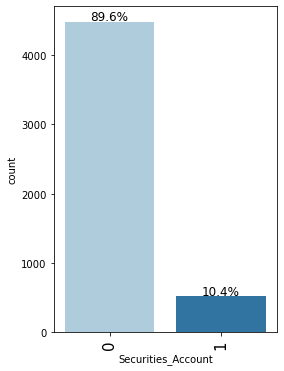

<IPython.core.display.Javascript object>

In [24]:
labeled_barplot(loan, "Securities_Account", perc=True)

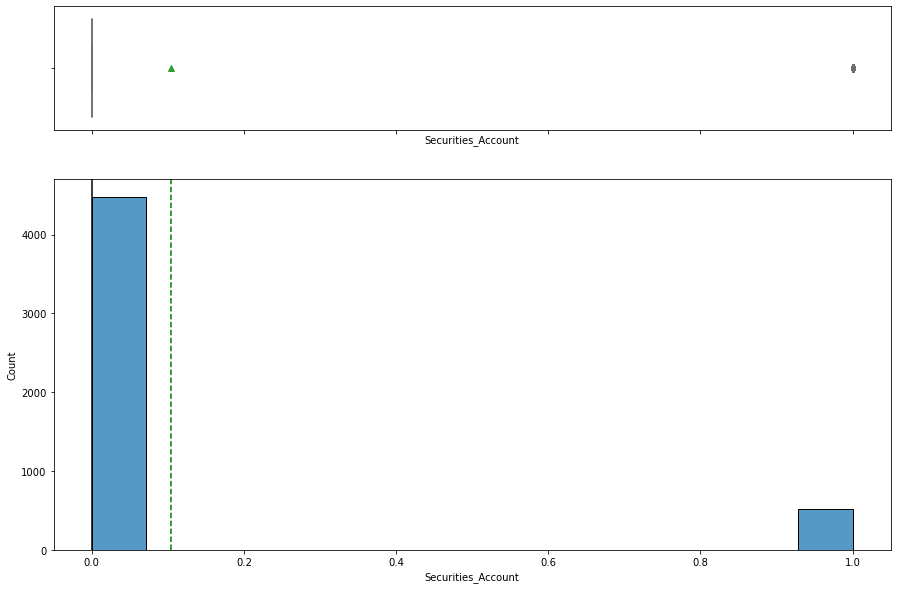

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(loan, "Securities_Account")

* Most customers ~89.6% do not have Securities Account.

## Observation on CreditCard

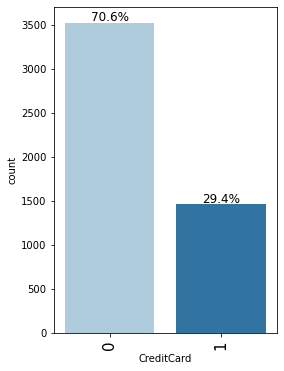

<IPython.core.display.Javascript object>

In [26]:
labeled_barplot(loan, "CreditCard", perc=True)

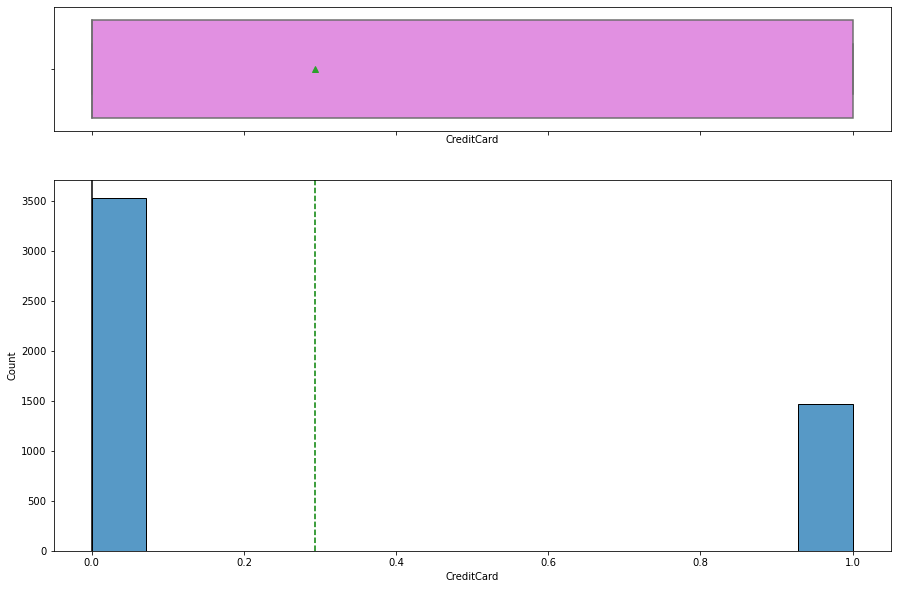

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(loan, "CreditCard")

## Observation on ZIPCode

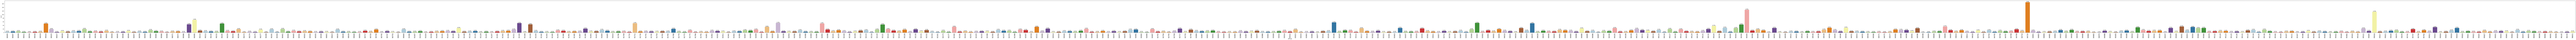

<IPython.core.display.Javascript object>

In [28]:
labeled_barplot(loan, "ZIPCode", perc=True)

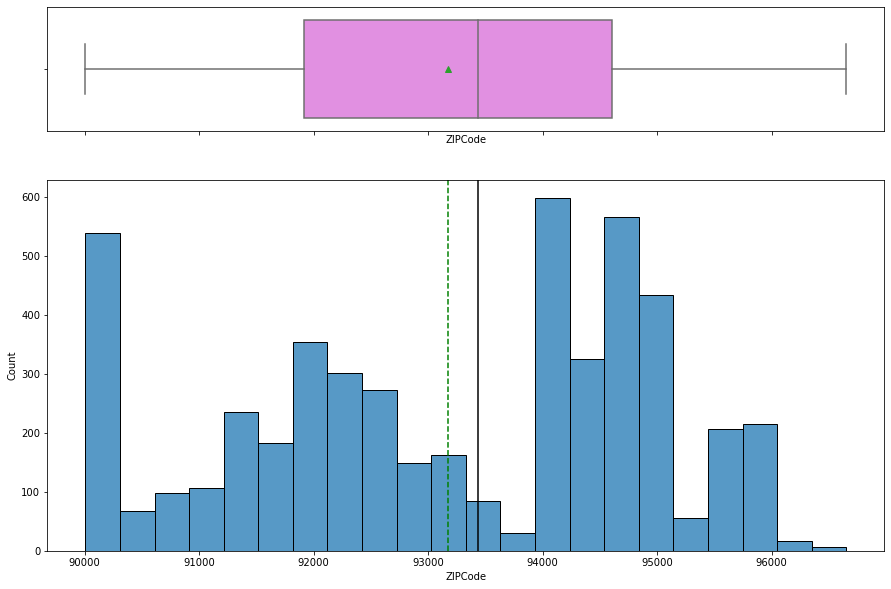

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(loan, "ZIPCode")

* Most of customers are living between 9400 to 9500

In [30]:
loan["ZIPCode"] = loan["ZIPCode"].astype(str)
print ( "Number of unique values by the first two digits.", loan["ZIPCode"].str[0:2].nunique())

Number of unique values by the first two digits. 7


<IPython.core.display.Javascript object>

In [31]:
loan["ZIPCode"] = loan["ZIPCode"].str[0:2]

<IPython.core.display.Javascript object>

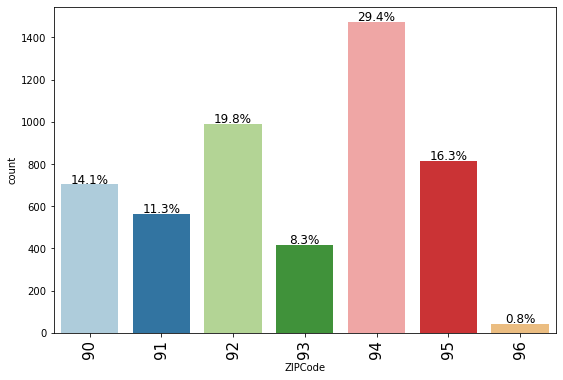

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(loan, "ZIPCode", perc=True)

* 30% of customers live in 94 zone followed by 19.8% in 92

## Bivariate Analysis

In [33]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


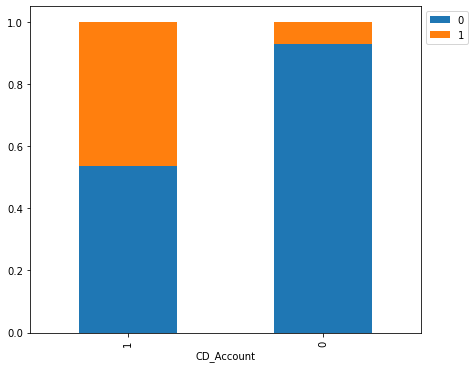

<IPython.core.display.Javascript object>

In [34]:
stacked_barplot(loan, "CD_Account", "Personal_Loan")

* ~50% ofcustomers with CD_Account have accepted Personal Loan in last campaign

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


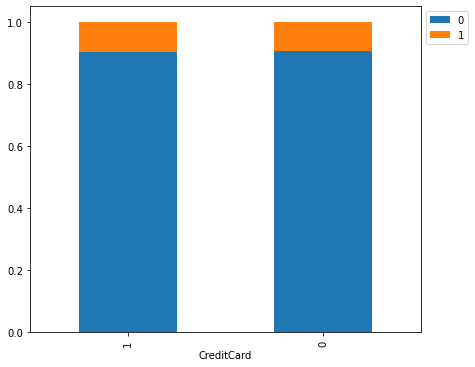

<IPython.core.display.Javascript object>

In [35]:
stacked_barplot(loan, "CreditCard", "Personal_Loan")

* ~90% of cutomers accepted Personal Loan in last campaign who have credit card issued by any of the banks.

Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
33              105   15   120
52              130   15   145
29              108   15   123
54              128   15   143
43              134   15   149
42              112   14   126
56              121   14   135
65               66   14    80
44              107   14   121
50              125   13   138
45              114   13   127
46              114   13   127
26               65   13    78
32              108   12   120
57              120   12   132
38              103   12   115
27               79   12    91
48              106   12   118
61              110   12   122
53              101   11   112
51              119   10   129
60              117   10   127
58              133   10   143
49              105   10   115
47      

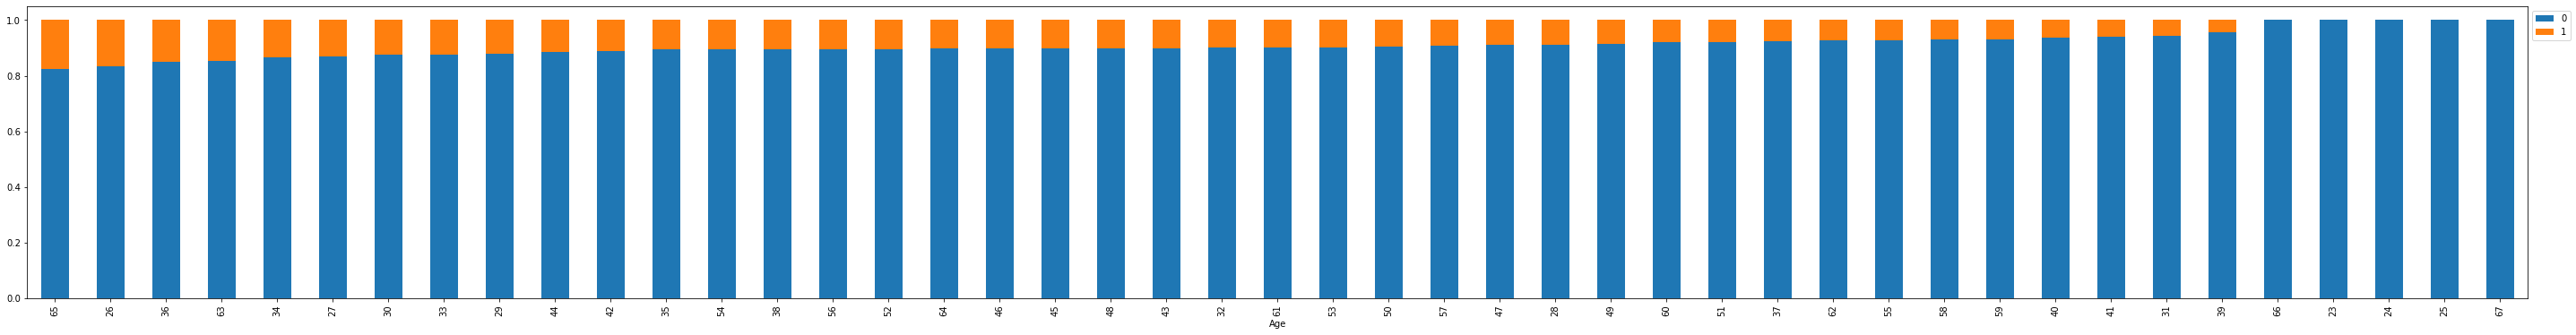

<IPython.core.display.Javascript object>

In [36]:
stacked_barplot(loan, "Age", "Personal_Loan")

* Most customers between age of 39 to 65 accepted Personal Loan in the last campaign.
* Customers 25 or below and customers 67 or above did not accept  Personal Loan in the last campaign.

Personal_Loan     0    1   All
Experience                    
All            4520  480  5000
9               127   20   147
8               101   18   119
20              131   17   148
3               112   17   129
12               86   16   102
32              140   14   154
19              121   14   135
5               132   14   146
25              128   14   142
26              120   14   134
37              103   13   116
11              103   13   116
16              114   13   127
30              113   13   126
22              111   13   124
35              130   13   143
23              131   13   144
36              102   12   114
29              112   12   124
7               109   12   121
6               107   12   119
18              125   12   137
31               92   12   104
28              127   11   138
21              102   11   113
13              106   11   117
17              114   11   125
34              115   10   125
39               75   10    85
27      

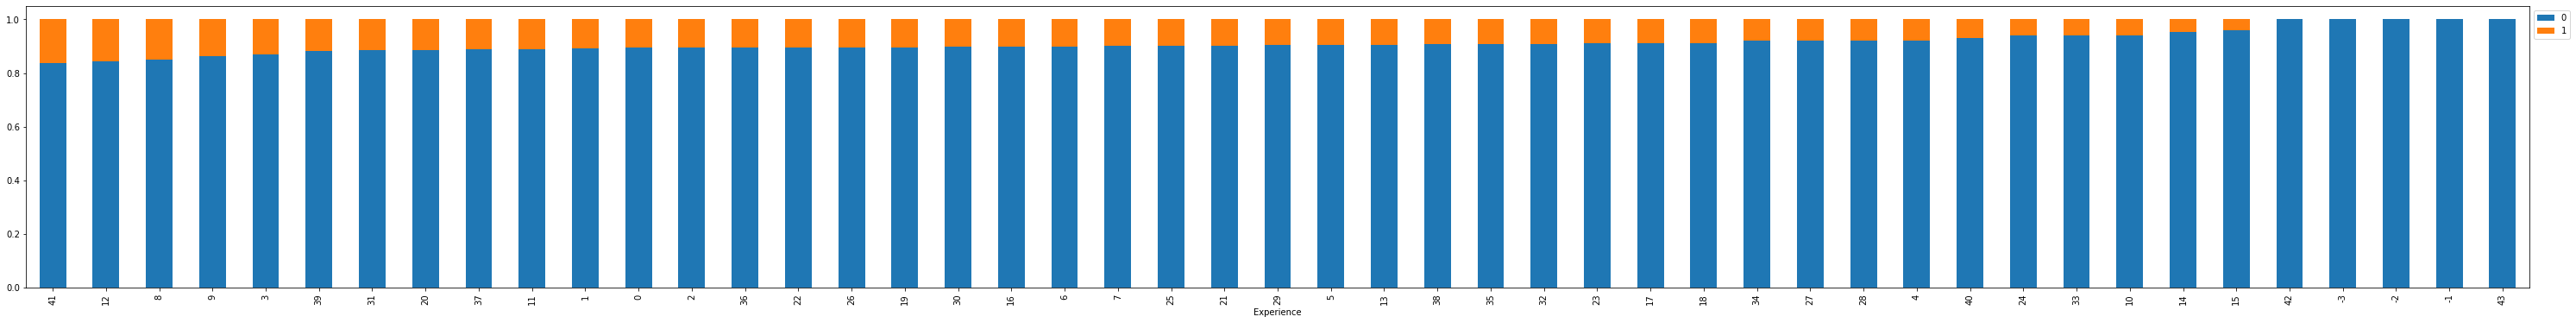

<IPython.core.display.Javascript object>

In [37]:
stacked_barplot(loan, "Experience", "Personal_Loan")

* 1, 2, 3 years are indicated in negative. This will be cleaned in Data Processing stage. A few age group did not accept personal loan in last campaign.

Personal_Loan     0    1   All
Income                        
All            4520  480  5000
130               8   11    19
182               2   11    13
158               8   10    18
135               8   10    18
179               8    9    17
141              15    9    24
154              12    9    21
123               9    9    18
184               3    9    12
142               7    8    15
131              11    8    19
129              15    8    23
172               3    8    11
173               5    8    13
170               4    8    12
180              10    8    18
115              19    8    27
125              16    7    23
164               6    7    13
188               3    7    10
83               67    7    74
114              23    7    30
161               9    7    16
122              17    7    24
133               8    7    15
132              11    7    18
191               6    7    13
134              13    7    20
111              15    7    22
190     

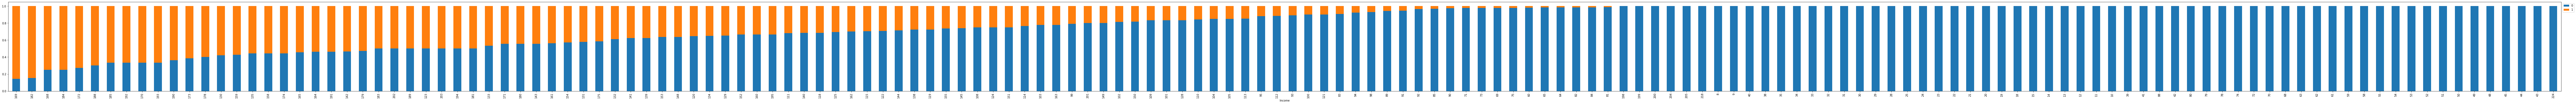

<IPython.core.display.Javascript object>

In [38]:
stacked_barplot(loan, "Income", "Personal_Loan")

* Most of Customers whose is income is above 81k accepted personal loan in last campaign and there are few outliers.

Personal_Loan     0    1   All
CCAvg                         
All            4520  480  5000
3.0              34   19    53
4.1               9   13    22
3.4              26   13    39
3.1               8   12    20
4.2               0   11    11
5.4               8   10    18
6.5               8   10    18
3.8              33   10    43
3.6              17   10    27
3.3              35   10    45
5.0               9    9    18
3.9              18    9    27
2.9              45    9    54
2.6              79    8    87
6.0              18    8    26
4.4               9    8    17
4.3              18    8    26
0.2             196    8   204
0.5             155    8   163
4.7              17    7    24
5.2               9    7    16
1.3             121    7   128
2.7              51    7    58
3.7              18    7    25
1.1              77    7    84
5.6               0    7     7
4.0              26    7    33
2.2             123    7   130
4.8               0    7     7
5.1     

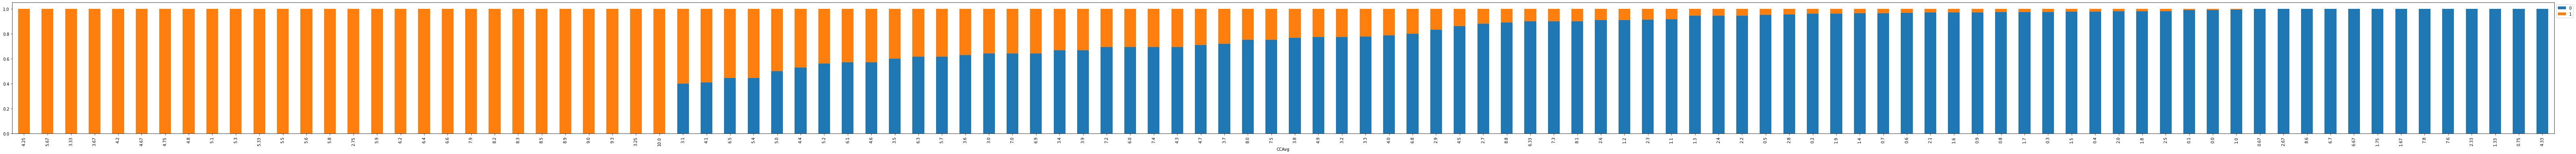

<IPython.core.display.Javascript object>

In [39]:
stacked_barplot(loan, "CCAvg", "Personal_Loan")

In [40]:
cat_cols=["Education", "Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]
loan[cat_cols]=loan[cat_cols].astype("category")
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   object  
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(6), object(1)
memory usage: 342.7+ KB


<IPython.core.display.Javascript object>

* Most customers between 5 to 10 K average Credit card expenditure accepted personal loans in last campaign

In [41]:
for i in cat_cols:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print(" " )

Unique values in Education are :
1    2096
3    1501
2    1403
Name: Education, dtype: int64
 
Unique values in Personal_Loan are :
0    4520
1     480
Name: Personal_Loan, dtype: int64
 
Unique values in Securities_Account are :
0    4478
1     522
Name: Securities_Account, dtype: int64
 
Unique values in CD_Account are :
0    4698
1     302
Name: CD_Account, dtype: int64
 
Unique values in Online are :
1    2984
0    2016
Name: Online, dtype: int64
 
Unique values in CreditCard are :
0    3530
1    1470
Name: CreditCard, dtype: int64
 


<IPython.core.display.Javascript object>

## Key Observations
* Most customer are undergraduate
* Most customers dont have Personal Loans
* Most customers ddont have Securitiesd Account
* Most customers dont have CD Account
* Most custmers have online account
* Most customers dont have credit card

# Data Pre-processing

In [42]:
## Convert data type of categorical variables to 'Category'
cat_cols =[
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard"
]
loan[cat_cols]= loan[cat_cols].astype("category")

<IPython.core.display.Javascript object>

In [43]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIPCode             5000 non-null   object  
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal_Loan       5000 non-null   category
 10  Securities_Account  5000 non-null   category
 11  CD_Account          5000 non-null   category
 12  Online              5000 non-null   category
 13  CreditCard          5000 non-null   category
dtypes: category(6), float64(1), int64(6), object(1)
memory usage: 342.7+ KB


<IPython.core.display.Javascript object>

In [44]:
# Drop ID as it has all unique non-serving values for the model
loan = loan.drop(["ID"], axis =1)

<IPython.core.display.Javascript object>

In [45]:
#Check categorical variables
loan.describe(include=["category"])

,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000,5000,5000,5000,5000,5000
unique,3,2,2,2,2,2
top,1,0,0,0,1,0
freq,2096,4520,4478,4698,2984,3530


<IPython.core.display.Javascript object>

## Outliers in each columns using IQR


In [46]:
Q1 =  loan.quantile(.25)
Q3 = loan.quantile(.75)
IQR = Q3 - Q1
lower = (
Q1 - 1.5 * IQR
)
upper = Q3 + 1.5 * IQR

<IPython.core.display.Javascript object>

In [47]:
((loan.select_dtypes(include=["float64", "int64"]) < lower)
| (loan.select_dtypes(include=["float64", "int64"]) > upper)).sum() /len(loan) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

<IPython.core.display.Javascript object>

### Oultliers do not need to be treated as we want to capture all details

## Model Building

## Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.

In [48]:
# Zip Code can be converted to categorical using dummies function
loan["ZIPCode"] = loan["ZIPCode"].astype("category")

<IPython.core.display.Javascript object>

In [49]:
# dropping Experience as its correlated to Age
X=loan.drop(["Personal_Loan", "Experience"], axis=1)
Y = loan["Personal_Loan"]
X = pd.get_dummies(X, columns =["ZIPCode", "Education"], drop_first=True)


<IPython.core.display.Javascript object>

## Split Data

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.30, random_state=1)

<IPython.core.display.Javascript object>

In [51]:
# encoding the categorical variables
print("Shape of Traning set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")

Shape of Traning set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:


<IPython.core.display.Javascript object>

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=1)

<IPython.core.display.Javascript object>

In [53]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3000
Number of rows in test data = 2000


<IPython.core.display.Javascript object>

In [54]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.904333
1    0.095667
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.9035
1    0.0965
Name: Personal_Loan, dtype: float64


<IPython.core.display.Javascript object>

## Build Decision Tree Model

### Model evaluation criterion

### Model can make wrong predictions as:
 
1. Predicting a customer will take a personal loan but in reality the customer would not.

2. Predicting a customer will not taking a personal loan but in reality the customer would.


### Which case is more important? 

* If we predict a customer will not take a personal loan but in reality the customer would, then it would be a loss of opportunity.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The make_confusion_matrix function will be used to plot confusion matrix.

In [55]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:,1]
    pred_thres=pred_prob>threshold
    pred=np.round(pred_thres)
    
    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [56]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [57]:
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:,1]
    pred_thres=pred_prob>threshold
    pred=np.round(pred_thres)
    
    cm = confusion_matrix(target, pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [58]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [128]:
lg=LogisticRegression(solver="newton-cg", random_state=1)
model=lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [129]:
log_reg_model_train_perf_with_threshold = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)
print("Training Performance")
log_reg_model_train_perf_with_threshold

Training Performance


,Accuracy,Recall,Precision,F1
0,0.957667,0.651568,0.873832,0.746507


<IPython.core.display.Javascript object>

#### Checking model performance on test set

In [130]:
log_reg_model_test_perf_with_threshold = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)
log_reg_model_test_perf_with_threshold

,Accuracy,Recall,Precision,F1
0,0.957,0.632124,0.890511,0.739394


<IPython.core.display.Javascript object>

## Build Decision Tree Model

In [131]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

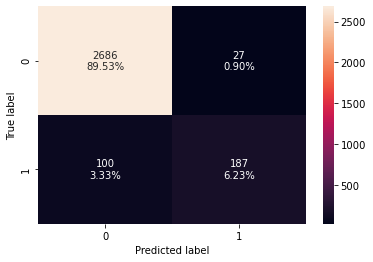

<IPython.core.display.Javascript object>

In [132]:
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [133]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [134]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.88601,0.904762,0.895288


<IPython.core.display.Javascript object>

* Model is giving good and generalized results on training and test set.

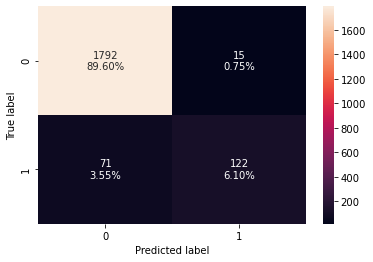

<IPython.core.display.Javascript object>

In [135]:
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

#### ROC-AUC on training data

No handles with labels found to put in legend.


Logistic Regression area= 0.9650013934713619 


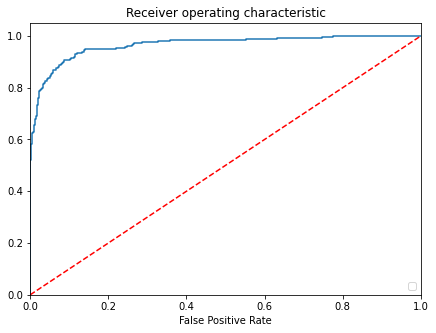

<IPython.core.display.Javascript object>

In [127]:
plt.figure(figsize=(7, 5))
                                       
print("Logistic Regression area= {} ".format(logit_roc_auc_train))
                                     
plt.plot(fpr, tpr, "")
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("Receiver operating characteritic")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [67]:
## Optimal threshold
fpr, tpr, thresholds = metrics.roc_curve(y_train,  lg.predict_proba(X_train)[:,1])
optimal_idx=np.argmax(tpr-fpr)
optimal_threshold_auc_roc=thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.11381229060162873


<IPython.core.display.Javascript object>

In [144]:
# Optimal threshold as per AUC-ROC curve
log_reg_model_train_perf_with_threshold = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
log_reg_model_train_perf_with_threshold

,Accuracy,Recall,Precision,F1
0,0.911667,0.902439,0.522177,0.661558


<IPython.core.display.Javascript object>

In [145]:
# Optimal threshold as per AUC-ROC curve
log_reg_model_test_perf_with_threshold = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
log_reg_model_test_perf_with_threshold

,Accuracy,Recall,Precision,F1
0,0.9065,0.865285,0.509146,0.641075


<IPython.core.display.Javascript object>

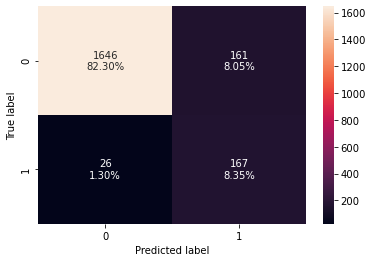

<IPython.core.display.Javascript object>

In [70]:
## Confusion Matrix using the above threshold
# Checking model performance
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_auc_roc)

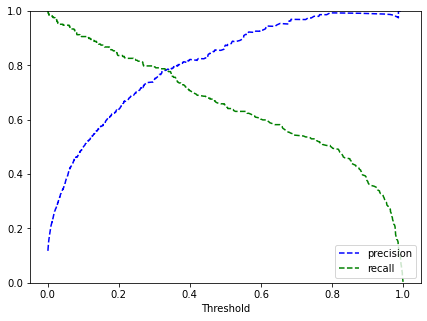

<IPython.core.display.Javascript object>

In [71]:
## Plot Precision recall curve to find a better threshold
y_scores = lg.predict_proba(X_train)[:,1]
prec, rec, tre = metrics.precision_recall_curve(y_train, y_scores)

plt.figure(figsize=(7, 5))
plt.plot(tre, prec[:-1], "b--", label="precision")
plt.plot(tre, rec[:-1], "g--", label="recall")
plt.xlabel("Threshold")
plt.ylim([0,1])

plt.legend(loc="lower right")
plt.show()

In [140]:
# threshold = 2.7
optimal_threshold_curve=0.31

<IPython.core.display.Javascript object>

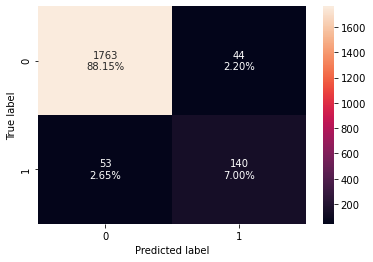

<IPython.core.display.Javascript object>

In [142]:
## Confusion Matrix using the above threshold
# Checking model performance
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test, threshold=optimal_threshold_curve)

In [146]:
# Optimal threshold as per AUC-ROC curve
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
log_reg_model_train_perf_threshold_curve

,Accuracy,Recall,Precision,F1
0,0.956333,0.790941,0.761745,0.776068


<IPython.core.display.Javascript object>

In [147]:
# Optimal threshold as per AUC-ROC curve
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
log_reg_model_test_perf_threshold_curve

,Accuracy,Recall,Precision,F1
0,0.9515,0.725389,0.76087,0.742706


<IPython.core.display.Javascript object>

#### Recall value has optimised than earlier model performance

## Visualizing the Decision Tree

In [76]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


<IPython.core.display.Javascript object>

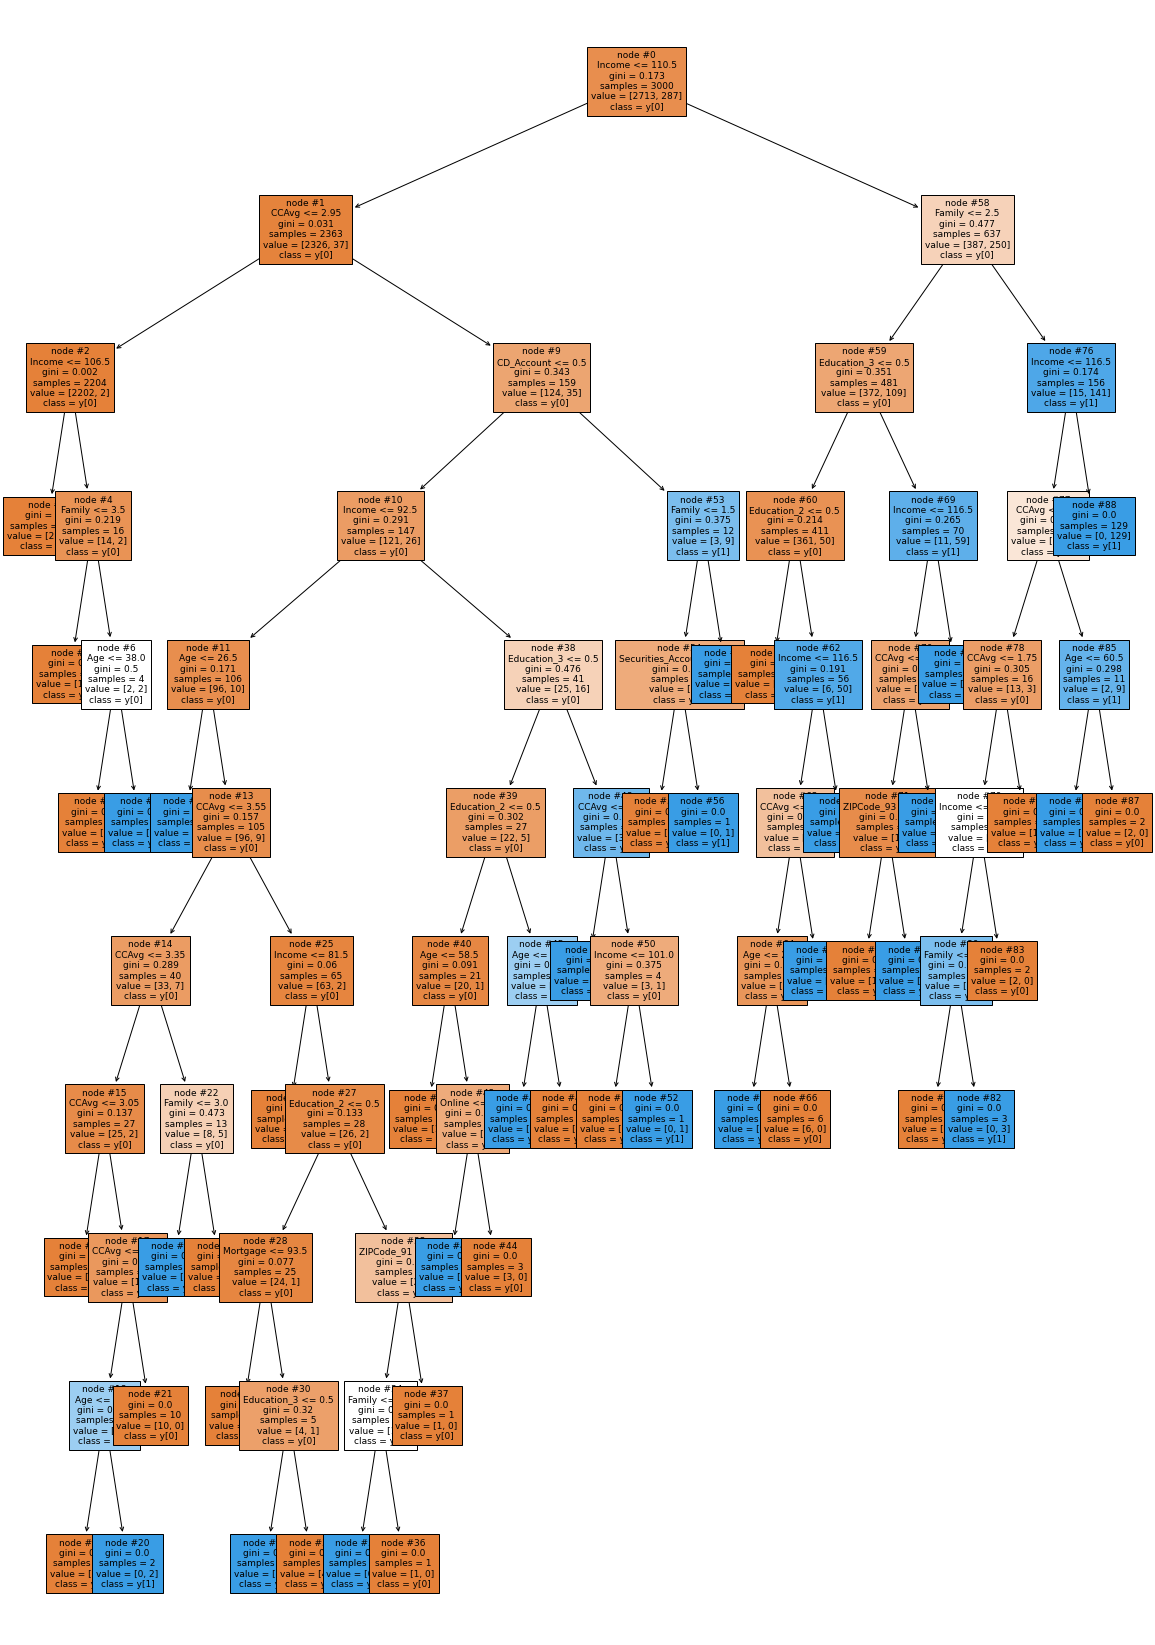

<IPython.core.display.Javascript object>

In [77]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [78]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2188.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 38.00
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- Age >  38.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.15
|   |   |   |   |   |   |   |   |   |--

<IPython.core.display.Javascript object>

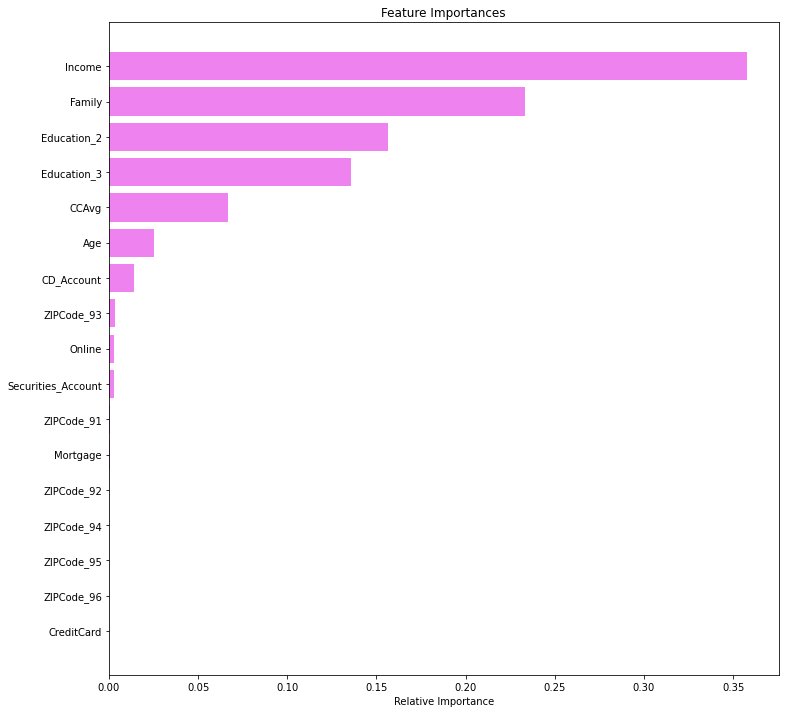

<IPython.core.display.Javascript object>

In [79]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income, Family and Education_2 are the top 3 important features.

### Using GridSearch for Hyperparameter tuning of our tree model 
* Let's see if we can improve our model performance even more.

In [112]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": [np.arange(2, 50, 5), None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.000001, 0.00001, 0.0001],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=1e-06,
                       random_state=1)

<IPython.core.display.Javascript object>

#### Checking performance on training set

In [113]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

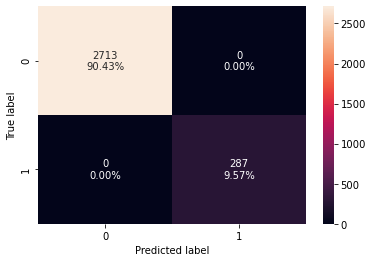

<IPython.core.display.Javascript object>

In [114]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* The Recall has improved on the training set as compared to the initial model.

#### Checking model performance on test set

In [115]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.9825,0.88601,0.929348,0.907162


<IPython.core.display.Javascript object>

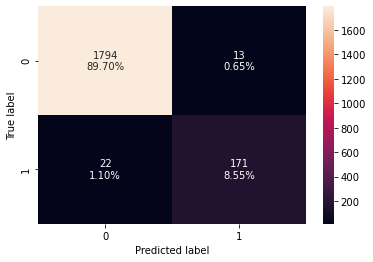

<IPython.core.display.Javascript object>

In [84]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* After hyperparameter tuning the model has performance has remained same and the model has become simpler.

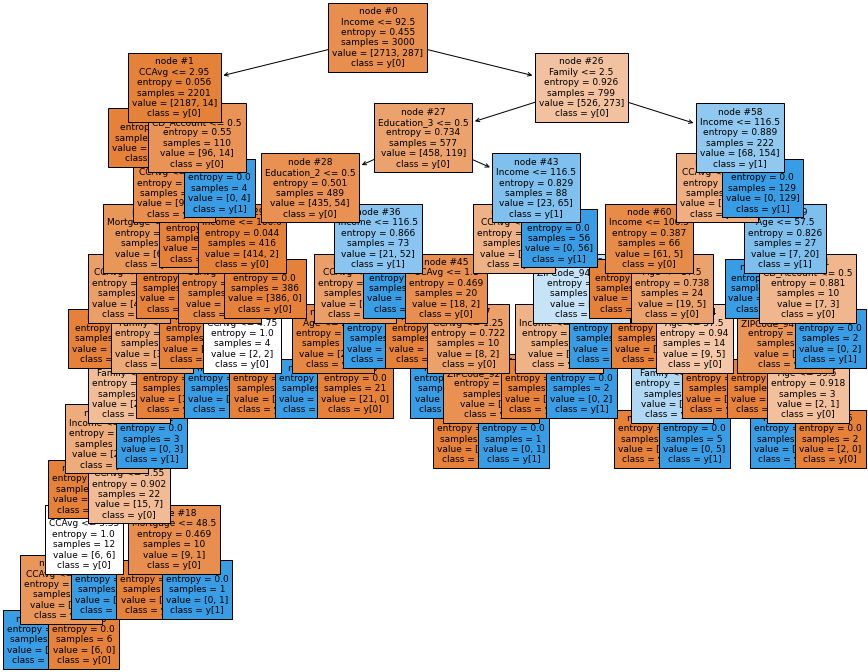

<IPython.core.display.Javascript object>

In [85]:
plt.figure(figsize=(15, 12))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* We are getting a simplified tree after pre-pruning.

## Cost Complexity Pruning

In [86]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

<IPython.core.display.Javascript object>

In [87]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000215,0.001292
2,0.000317,0.001927
3,0.000412,0.003162
4,0.000444,0.004494
5,0.000500,0.004994
6,0.000500,0.005494
7,0.000500,0.006494
8,0.000571,0.007065
9,0.000611,0.007676


<IPython.core.display.Javascript object>

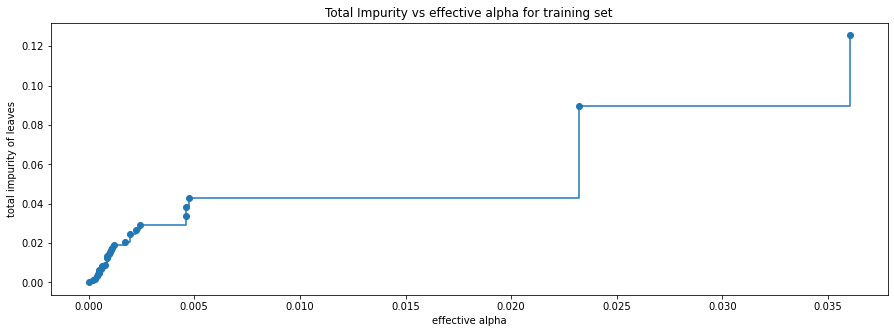

<IPython.core.display.Javascript object>

In [88]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [89]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04749278966498974


<IPython.core.display.Javascript object>


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

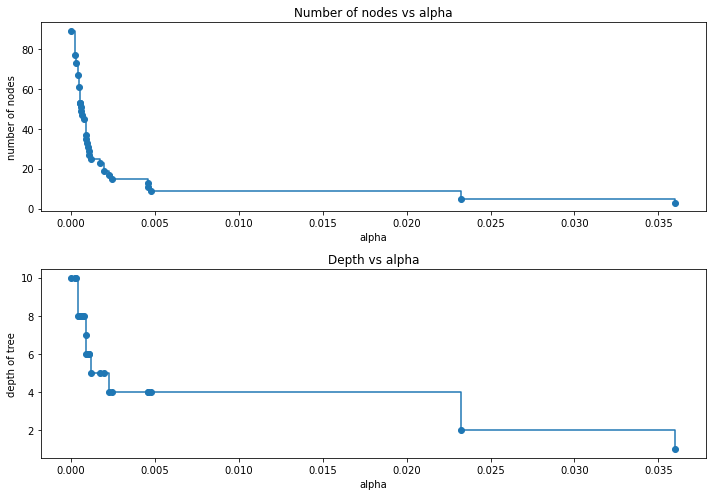

<IPython.core.display.Javascript object>

In [90]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

Recall vs alpha for training and testing sets
----------------------------------------------------

In [91]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

<IPython.core.display.Javascript object>

In [92]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

<IPython.core.display.Javascript object>

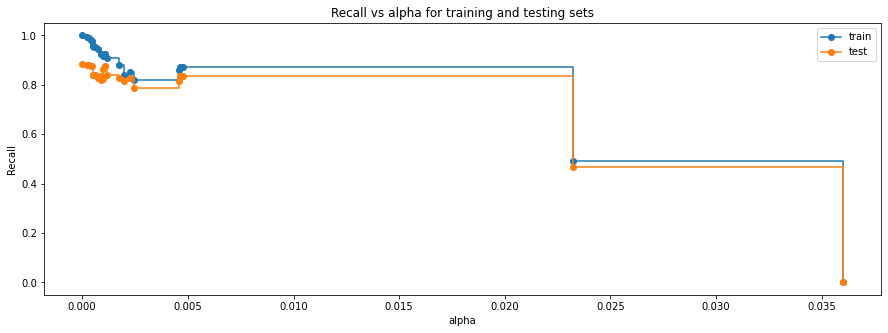

<IPython.core.display.Javascript object>

In [93]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [94]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [148]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

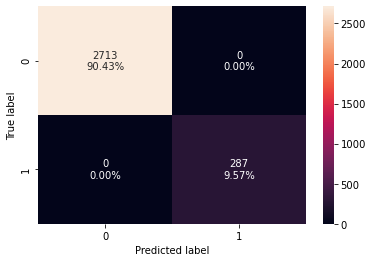

<IPython.core.display.Javascript object>

In [149]:
confusion_matrix_sklearn(best_model, X_train, y_train)

#### Checking model performance on test set

In [97]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.98,0.88601,0.904762,0.895288


<IPython.core.display.Javascript object>

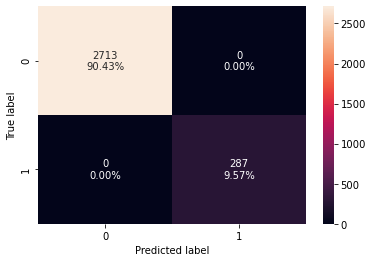

<IPython.core.display.Javascript object>

In [98]:
confusion_matrix_sklearn(best_model, X_train, y_train)

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.

## Visualizing the Decision Tree

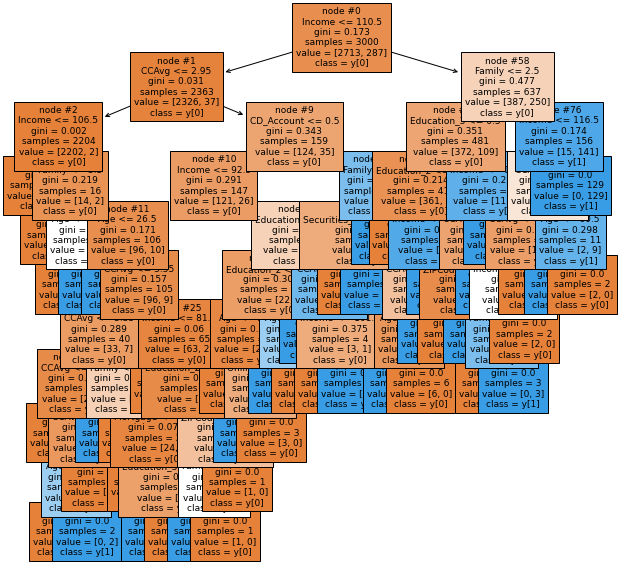

<IPython.core.display.Javascript object>

In [99]:
plt.figure(figsize=(10, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [100]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 110.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2188.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Age <= 38.00
|   |   |   |   |   |--- weights: [2.00, 0.00] class: 0
|   |   |   |   |--- Age >  38.00
|   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Income <= 92.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- CCAvg <= 3.05
|   |   |   |   |   |   |   |   |--- weights: [14.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- CCAvg >  3.05
|   |   |   |   |   |   |   |   |--- CCAvg <= 3.15
|   |   |   |   |   |   |   |   |   |--

<IPython.core.display.Javascript object>

In [101]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.357627
Family              0.233501
Education_2         0.156347
Education_3         0.135760
CCAvg               0.067018
Age                 0.025136
CD_Account          0.014041
ZIPCode_93          0.003532
Online              0.002890
Securities_Account  0.002890
ZIPCode_91          0.000642
Mortgage            0.000616
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


<IPython.core.display.Javascript object>

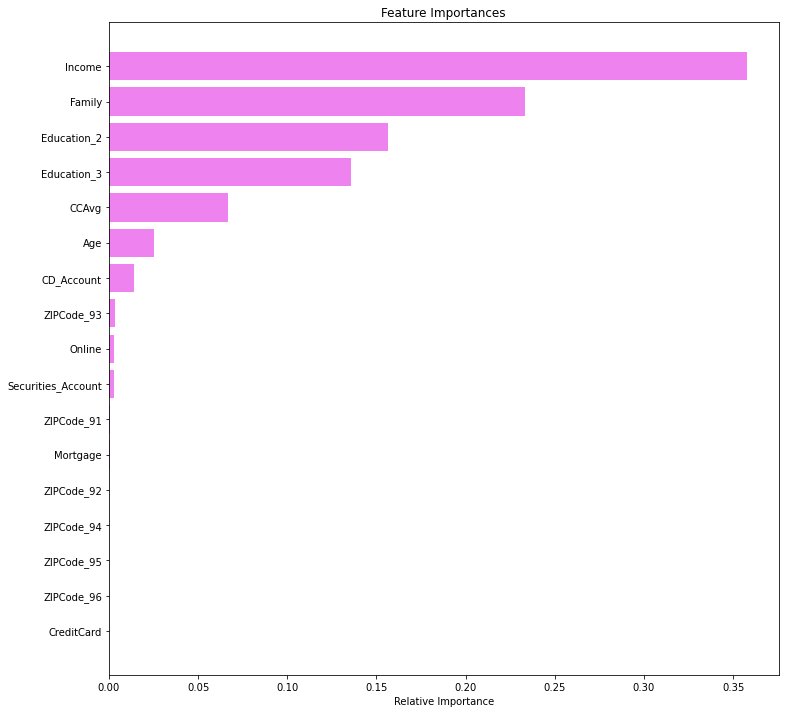

<IPython.core.display.Javascript object>

In [102]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [103]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

<IPython.core.display.Javascript object>

* Income, Family Size, and Graduate Education remain the most important feature with post-pruning too.

## Comparing all the decision tree models

In [104]:
decision_tree_perf_train = model_performance_classification_sklearn(model, X_train, y_train)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [105]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.9825,0.88601,0.929348,0.907162


<IPython.core.display.Javascript object>

In [106]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,1.0,1.0
Recall,1.0,1.0,1.0
Precision,1.0,1.0,1.0
F1,1.0,1.0,1.0


<IPython.core.display.Javascript object>

In [111]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980000,0.982500,0.980000
Recall,0.886010,0.886010,0.886010
Precision,0.904762,0.929348,0.904762
F1,0.895288,0.907162,0.895288


<IPython.core.display.Javascript object>

* Decision tree with post-pruning is giving the highest recall on the test set.


## Business Insights

* Income, family Size and Graduate Education are the most important variables to help decide whether a customer will take a personal loan or not.
* Criteria to approve loan according to decision tree model should depend on three main factors - Income, family Size and Education.
* Usually people with income less than 110 less mortgage and family size

## Misclassification Analysis

In [150]:
loan["ZIPCode"] = loan["ZIPCode"].astype("category")
X= loan.drop(["Personal_Loan", "Experience"], axis =1)
Y=loan[["Personal_Loan"]]
X=pd.get_dummies(X, columns =["ZIPCode", "Education"], drop_first=True)

X_train, X_test, y_train, y_test=train_test_split(X,Y, test_size=0.30, random_state=1)
Y1=model.predict(X_test)
Y1=Y1.reshape(1500,1)
Y2=np.subtract(y_test.astype("int"), Y1)

data1=pd.DataFrame(Y2)
data2=pd.concat([X_test, data1], axis=1)

<IPython.core.display.Javascript object>

In [151]:
misclassified=data2[data2["Personal_Loan"] != 0]

<IPython.core.display.Javascript object>

In [152]:
misclassified.shape

(34, 18)

<IPython.core.display.Javascript object>

##### There are 21 misclassifications on the test set.

In [153]:
misclassified.head(21)

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Education_2,Education_3,Personal_Loan
792,41,98,1,4.0,0,0,0,0,1,0,0,1,0,0,0,0,1,-1
2982,59,111,3,4.4,0,0,0,1,0,0,0,0,0,1,0,0,0,-1
3988,59,85,1,3.4,0,0,1,0,1,1,0,0,0,0,0,0,1,1
927,65,95,3,3.7,138,0,0,0,1,0,0,0,0,1,0,1,0,1
1518,43,64,4,3.0,221,0,0,1,0,0,0,0,0,1,0,0,1,1
2784,36,115,4,2.2,0,0,0,0,0,1,0,0,0,0,0,1,0,1
3792,62,109,4,1.7,0,0,0,1,0,0,1,0,0,0,0,0,1,-1
12,48,114,2,3.8,0,1,0,0,0,0,0,1,0,0,0,0,1,-1
1577,34,65,1,3.0,227,0,0,1,0,0,1,0,0,0,0,0,0,1
1499,52,91,1,4.3,0,0,1,1,1,0,1,0,0,0,0,1,0,1


<IPython.core.display.Javascript object>

In [154]:
profile=ProfileReport(misclassified, title="Misclassified Data", minimal=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/27 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

In [155]:
profile.to_notebook_iframe()

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

### Looking at above profile, we see that incorrectly classified people are :
* Usually between 32 to 65 age, and have income bwteen 64k to 115k have 15 and 14 distinct values respectively. 
* Most people misclassified have zero mortgage, zero securities account and zero CD Account and family size 1 or 2.
